# Hashtags study

## Import

In [1]:
import pandas as pd
import json
import numpy as np
from itertools import repeat

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

from concurrent.futures import wait as futures_wait
from concurrent.futures.process import ProcessPoolExecutor

import importlib
import sys
sys.path.insert(0, '../3_Hashtag_study')
import hashtag_util as ut
sys.path.insert(0, '../')
import general_utils as gen_ut

## Dataset preparation

In [2]:
df = pd.read_csv('../tweets.csv',low_memory=False,
                 usecols=['user_screen_name','hashtags'])

In [3]:
data = pd.read_csv('../1_Dataset_preparation/listControlledUsers.csv')  
listNovax = data[data['malicious']]
listLinkLow = data[data['linkLow']]
listProvax = data[data['benevolent']]


In [4]:
df_novax = df[np.in1d(df['user_screen_name'], listNovax)].copy()
df_provax = df[np.in1d(df['user_screen_name'], listProvax)].copy()

In [5]:
#Creating a map of all hashtags with the number of uses
listHashtags = []

for s in df['hashtags']:    
    [ listHashtags.append(x) for x in gen_ut.get_string_json(s,'text') ]
    
dfHashtags_total = pd.DataFrame()
dfHashtags_total['hashtags'] = listHashtags
dfHashtags_total['count_total'] = 0

dfHashtags_total = dfHashtags_total.groupby('hashtags').count()
dfHashtags_total.sort_values(['count_total'],axis = 0,inplace=True,ascending=False)

dfHashtags_total

,count_total
hashtags,
vaccino,142684
vaccini,105989
COVID19,74834
AstraZeneca,56306
coronavirus,39407
...,...
Leishmaniosi,1
detta,1
Leipzig,1


In [6]:
#Creating a map of all hashtags used by the benignant users
listHashtags_provax = []

for s in df_provax['hashtags']:    
    [ listHashtags_provax.append(x) for x in gen_ut.get_string_json(s,'text') ]
    
dfHashtags_provax = pd.DataFrame()
dfHashtags_provax['hashtags'] = listHashtags_provax
dfHashtags_provax['count_provax'] = 0

dfHashtags_provax = dfHashtags_provax.groupby('hashtags').count()
dfHashtags_provax.sort_values(['count_provax'],axis = 0,inplace=True,ascending=False)

dfHashtags_provax

,count_provax
hashtags,
vaccini,371
vaccino,367
COVID19,252
VaccinoAntiCovid,191
vaccinoCovid,154
...,...
SanRaffaele,1
SaluteLazio,1
Salute,1


In [7]:
#Creating a map of all hashtags used by the malicius users
listHashtags_novax = []

for s in df_novax['hashtags']:    
    [ listHashtags_novax.append(x) for x in gen_ut.get_string_json(s,'text') ]
    
dfHashtags_novax = pd.DataFrame()
dfHashtags_novax['hashtags'] = listHashtags_novax
dfHashtags_novax['count_novax'] = 0

dfHashtags_novax = dfHashtags_novax.groupby('hashtags').count()
dfHashtags_novax.sort_values(['count_novax'],axis = 0,inplace=True,ascending=False)

dfHashtags_novax

,count_novax
hashtags,
vaccino,2259
vaccini,1541
COVID19,1404
Covid19,920
vaccinoCovid,855
...,...
Recovery,1
Ravenna,1
Ranucci,1


## Difference between the two sets of hashtag

In [8]:
dfHashtags = pd.concat([dfHashtags_novax,dfHashtags_provax], axis=1)
dfHashtags.fillna(0,inplace=True)

dfHashtags['count_total'] = dfHashtags['count_novax'] + dfHashtags['count_provax']
dfHashtags.sort_values(by=['count_total'],inplace=True,ascending=False)

dfHashtags

,count_novax,count_provax,count_total
hashtags,,,
vaccino,2259.0,367.0,2626.0
vaccini,1541.0,371.0,1912.0
COVID19,1404.0,252.0,1656.0
vaccinoCovid,855.0,154.0,1009.0
Covid19,920.0,51.0,971.0
...,...,...,...
DLDittatura,1.0,0.0,1.0
DPCMnatale,1.0,0.0,1.0
Dallas,1.0,0.0,1.0


In [18]:
#Get all hashtag used only by novax
dfHashatg_onlyNovax = dfHashtags[dfHashtags['count_provax']==0].copy()
dfHashatg_onlyNovax.drop(columns=['count_novax','count_provax'],inplace=True)
dfHashatg_onlyNovax.rename(columns={"count_total": "count"},inplace=True)
print('Total hashtag used ',sum(dfHashatg_onlyNovax['count']))
dfHashatg_onlyNovax

Total hashtag used  13691.0


,count
hashtags,
Byoblu24,306.0
NessunaCorrelazione,257.0
nessunacorrelazione,196.0
BillGates,160.0
Bassetti,139.0
...,...
DIRETTA,1.0
DLDittatura,1.0
DPCMnatale,1.0


In [17]:
#Get all hashtag used only by novax
dfHashatg_onlyProvax = dfHashtags[dfHashtags['count_novax']==0].copy()
dfHashatg_onlyProvax.drop(columns=['count_novax','count_provax'],inplace=True)
dfHashatg_onlyProvax.rename(columns={"count_total": "count"},inplace=True)
print('Total hashtag used ',sum(dfHashatg_onlyProvax['count']))
dfHashatg_onlyProvax

Total hashtag used  520.0


,count
hashtags,
medicalfacts,38.0
robertoburioni,30.0
Medicalfacts,25.0
MedicalFacts,14.0
Gimbe,14.0
...,...
HepFreeFuture,1.0
ICMRA,1.0
INMI,1.0


## Grafical visualization

### Provax account

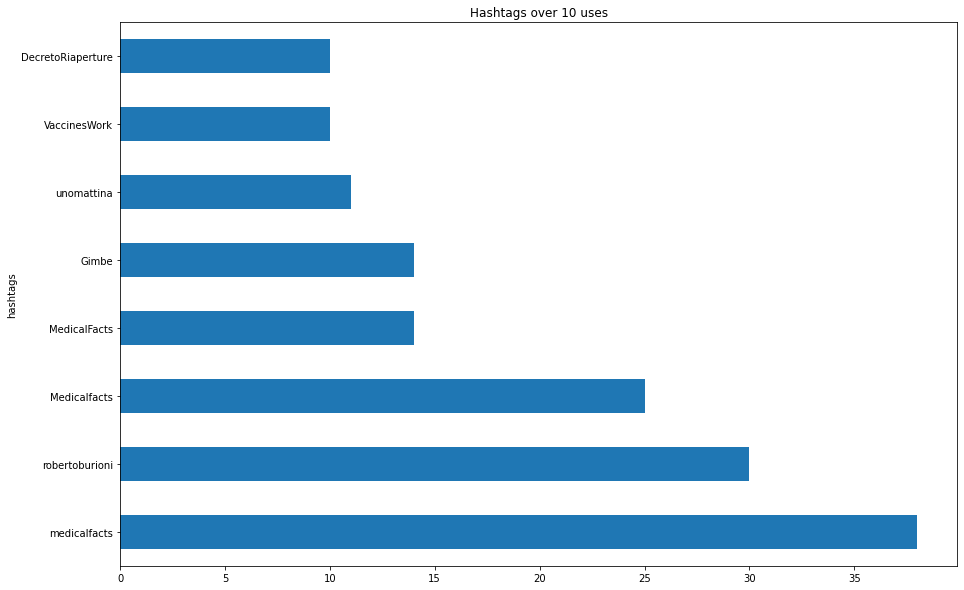

In [13]:
ut.visual_histogram(dfHashatg_onlyProvax,10)

### Novax account

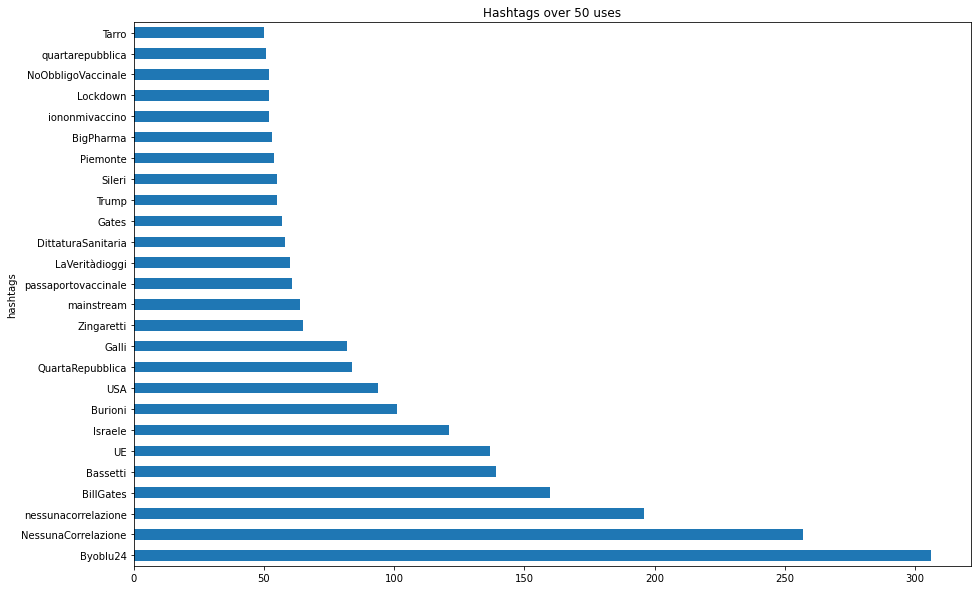

In [14]:
ut.visual_histogram(dfHashatg_onlyNovax,50)